# Waze project

## Background on the Waze scenario

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. 

You’ll collaborate with your Waze teammates to analyze and interpret data, generate valuable insights, and help leadership make informed business decisions. Your team is about to start a new project to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. 

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as: 

* Who are the users most likely to churn?
* Why do users churn? 
* When do users churn? 

For example, if Waze can identify a segment of users who are at high risk of churning, Waze can proactively engage these users with special offers to try and retain them. Otherwise, Waze may lose these users without knowing why. 

Your insights will help Waze leadership optimize the company’s retention strategy, enhance user experience, and make data-driven decisions about product development.

## Project goal: 

Waze leadership has asked your data team to develop a machine learning model to predict user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

## Background: 

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. 

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 

from scipy import stats 

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('waze_dataset.csv')
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## Scenario: 

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal, and used Python to inspect and organize Waze’s user data. Now, the data is ready for exploratory data analysis (EDA) and further data visualization. 

**Tasks:**

* Clean data
* Handle outliers 
* Perform EDA
* Visualize data
* Share an executive summary with the Waze data team 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [4]:
missing_value = data.isnull().sum()
missing_value

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Since we are interested in user churn, the label column is essential. Besides label, variables that tie to user behaviors will be the most applicable. All variables tie to user behavior except ID.

In [5]:
data = data.drop(columns = ['ID']) 
data = data.dropna(axis = 0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [7]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


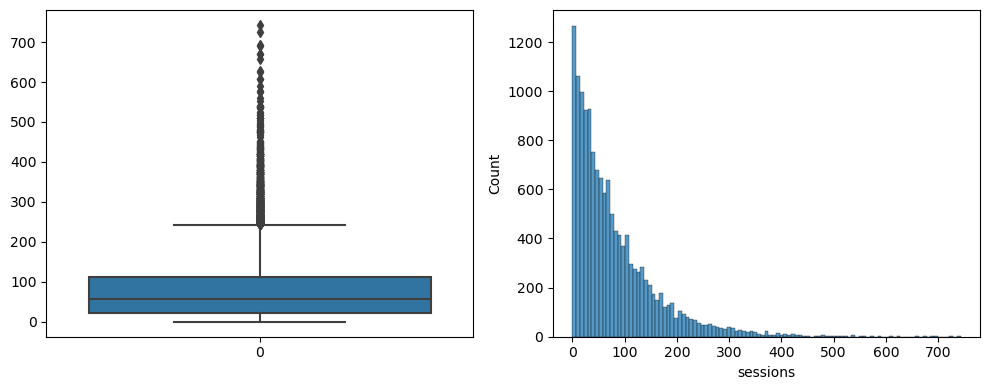

In [8]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.boxplot(data['sessions'], ax = axes[0]) 
sns.histplot(data['sessions'], ax = axes[1])
plt.tight_layout()
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

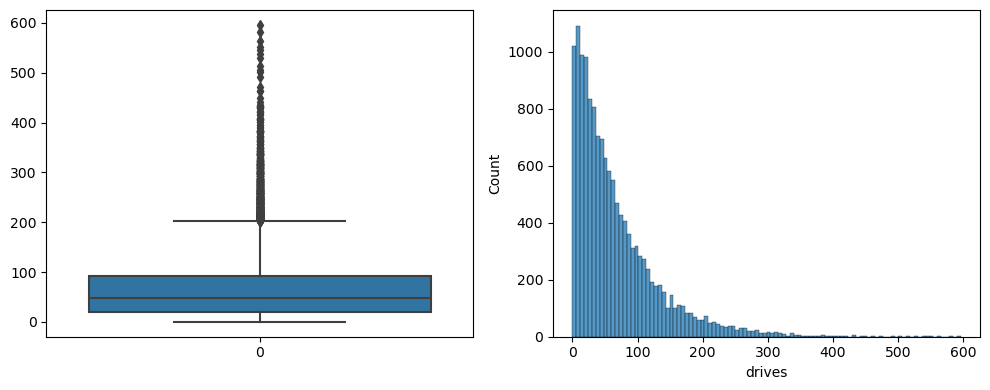

In [9]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.boxplot(data['drives'], ax = axes[0]) 
sns.histplot(data['drives'], ax = axes[1])
plt.tight_layout()
plt.show()

The `drives` information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

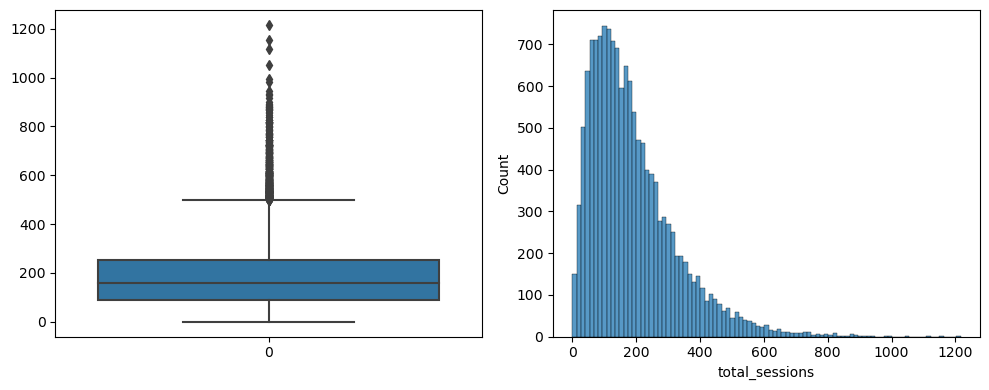

In [10]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.boxplot(data['total_sessions'], ax = axes[0]) 
sns.histplot(data['total_sessions'], ax = axes[1])
plt.tight_layout()
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of `sessions` in the last month was 48 and the median `total sessions` was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

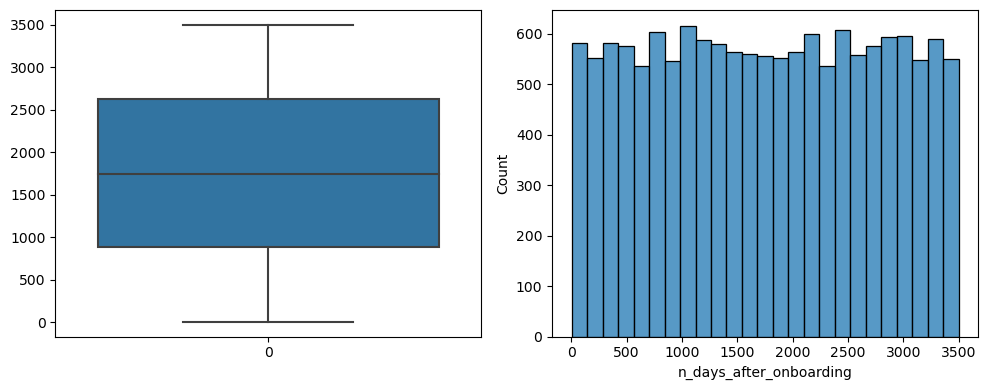

In [11]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.boxplot(data['n_days_after_onboarding'], ax = axes[0]) 
sns.histplot(data['n_days_after_onboarding'], ax = axes[1])
plt.tight_layout()
plt.show()

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to 3,500 (about 10 years).

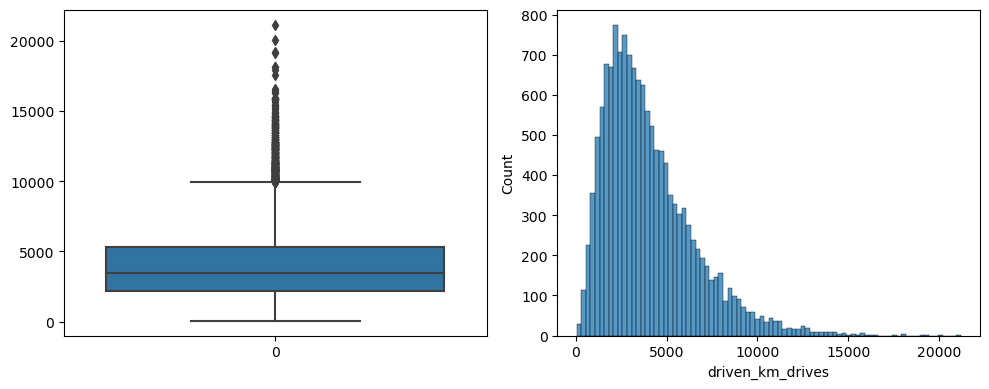

In [12]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.boxplot(data['driven_km_drives'], ax = axes[0]) 
sns.histplot(data['driven_km_drives'], ax = axes[1])
plt.tight_layout()
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive a lot. The longest distance driven in the month was over half the circumferene of the earth.

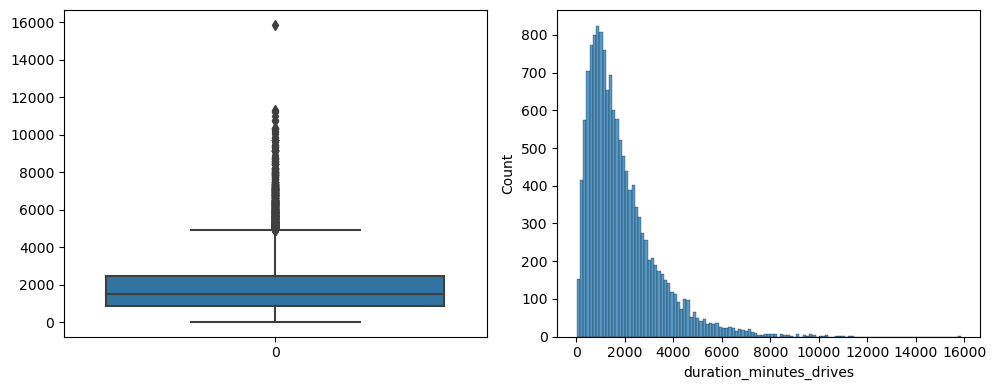

In [13]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.boxplot(data['duration_minutes_drives'], ax = axes[0]) 
sns.histplot(data['duration_minutes_drives'], ax = axes[1])
plt.tight_layout()
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than 1,500 minutes (~25 hours), but some users clocked over 250 hours over the month.

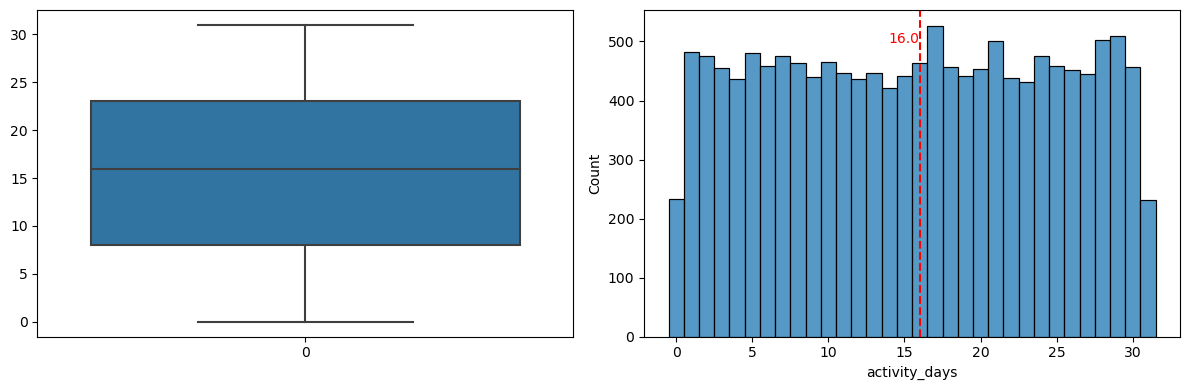

In [14]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data['activity_days'], ax = axes[0]) 
sns.histplot(data['activity_days'], ax = axes[1], discrete = True)
median = data['activity_days'].median()
axes[1].axvline(median, color = 'red', linestyle = '--')
axes[1].text(median, axes[1].get_ylim()[1] * 0.9, round(median,2), color='red', ha='right')
plt.tight_layout()
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

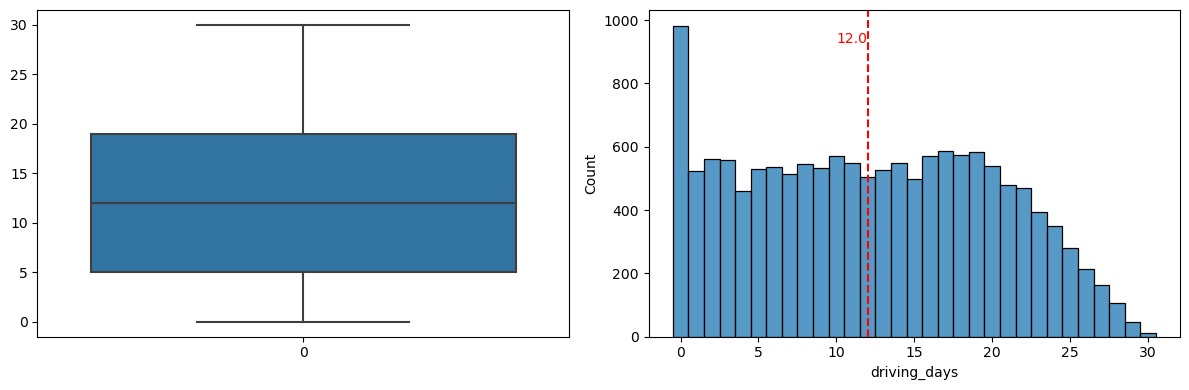

In [15]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data['driving_days'], ax = axes[0]) 
sns.histplot(data['driving_days'], ax = axes[1], discrete = True)
median = data['driving_days'].median()
axes[1].axvline(median, color = 'red', linestyle = '--')
axes[1].text(median, axes[1].get_ylim()[1] * 0.9, round(median,2), color='red', ha='right')
plt.tight_layout()
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

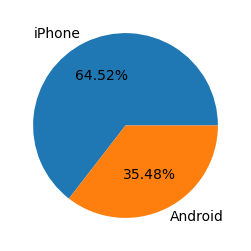

In [16]:
fig = plt.figure(figsize = (5,3))
device_count = data['device'].value_counts()
plt.pie(device_count, labels = device_count.index, autopct = '%.2f%%') 
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

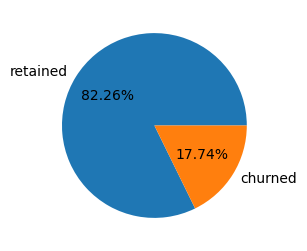

In [17]:
fig = plt.figure(figsize = (5,3))
device_count = data['label'].value_counts()
plt.pie(device_count, labels = device_count.index, autopct = '%.2f%%') 
plt.show()

Less than 18% of the users churned.

**`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

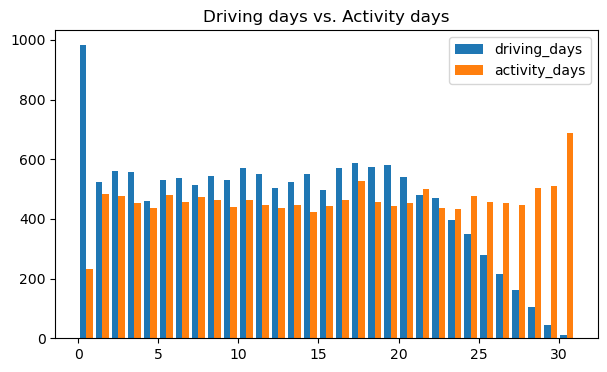

In [18]:
fig = plt.figure(figsize = (7,4))
plt.hist(data[['driving_days', 'activity_days']], bins = range(0,32,1), label = ['driving_days', 'activity_days'])
plt.title('Driving days vs. Activity days')
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [19]:
max_driving_days = data['driving_days'].max()
max_activity_days = data['activity_days'].max()

print(f"Maximum days of 'driving_days': {max_driving_days}")
print(f"Maximum days of 'activity_days': {max_activity_days}")

Maximum days of 'driving_days': 30
Maximum days of 'activity_days': 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

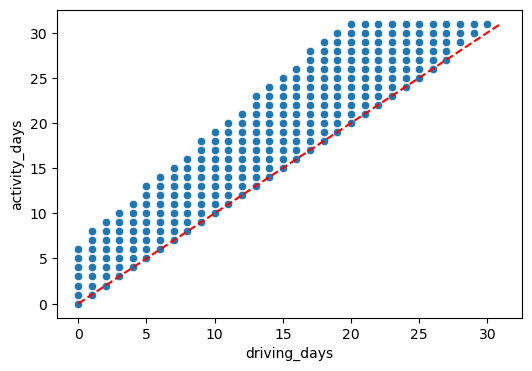

In [20]:
fig = plt.figure(figsize = (6,4))
sns.scatterplot(x = data['driving_days'], y = data['activity_days'])
plt.plot([0,31], [0,31], color='red', linestyle='--');
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

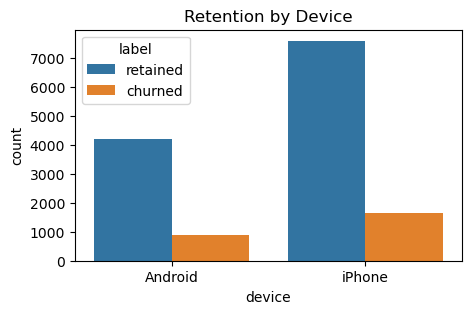

In [21]:
fig = plt.figure(figsize = (5,3))
sns.countplot(x = data['device'], hue = data['label'])
plt.title('Retention by Device')
plt.show()

The proportion of churned users to retained users is consistent between device types.

In [22]:
data['km_per_driving_day'] = data['driven_km_drives']/data['driving_days']

In [23]:
data['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [24]:
data.loc[data['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

In [25]:
data['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

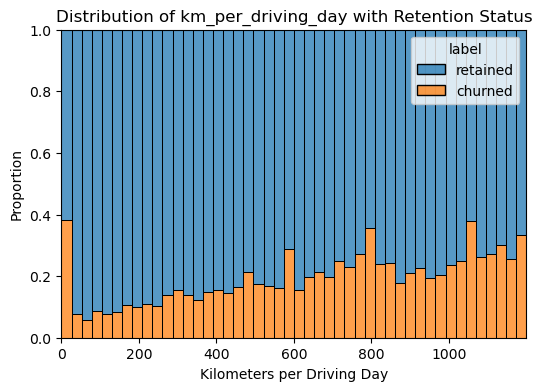

In [26]:
filtered_data = data[data['km_per_driving_day'] <= 1200]

fig = plt.figure(figsize = (6,4))
sns.histplot(data=filtered_data, x='km_per_driving_day', hue='label', multiple='fill')
plt.title('Distribution of km_per_driving_day with Retention Status')
plt.xlabel('Kilometers per Driving Day')
plt.ylabel('Proportion')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases. We can investigate further the reasons for long-distance users to discontinue using the app.

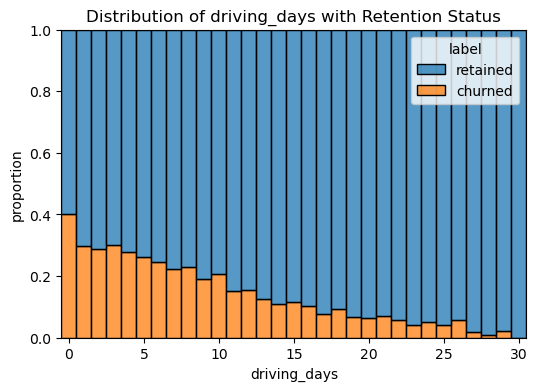

In [27]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data=filtered_data, x='driving_days', hue='label', multiple='fill', discrete = True)
plt.title('Distribution of driving_days with Retention Status')
plt.xlabel('driving_days')
plt.ylabel('proportion')
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

In [28]:
data['percent_sessions_in_last_month'] = data['sessions'] / data['total_sessions']

In [29]:
data['percent_sessions_in_last_month'].describe()

count    14299.000000
mean         0.449837
std          0.286863
min          0.000000
25%          0.196890
50%          0.424310
75%          0.687251
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

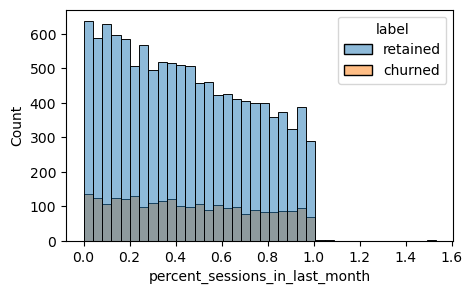

In [30]:
plt.figure(figsize = (5,3))
sns.histplot(x = data['percent_sessions_in_last_month'], hue = data['label'])
plt.show()

In [31]:
data['n_days_after_onboarding'].median()

1749.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

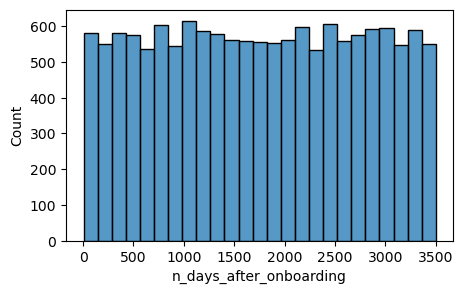

In [32]:
filtered_data = data[data['percent_sessions_in_last_month'] > 0.4]
plt.figure(figsize = (5,3))
sns.histplot(data['n_days_after_onboarding'])
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### Conclusions: 
Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

## Scenario: 

Your team is nearing the midpoint of their user churn project. So far, you’ve completed a project proposal, and used Python to analyze and visualize Waze’s user data. Now, leadership has a new request for your team: use hypothesis testing to analyze the relationship between mean amount of rides and device type. 

**Tasks:**

* Compute descriptive statistics
* Conduct a two-sample hypothesis test
* Share an executive summary with the Waze leadership team

In [33]:
device_map = {'Android': 0, 'iPhone': 1}
data['device_2'] = data['device']
data['device_2'] = data['device_2'].map(device_map)

In [41]:
data.groupby(['device'])[['drives']].mean()

,drives
device,
Android,66.024241
iPhone,67.933225


Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).


**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [46]:
iphone_drives = data[data['device_2'] == 1]['drives']
android_drives = data[data['device_2'] == 0]['drives']

In [47]:
stats.ttest_ind(a = iphone_drives, b = android_drives, equal_var = False)

Ttest_indResult(statistic=1.676594122141587, pvalue=0.09365074661708836)

Since the p-value is larger than the chosen significance level (5%), you fail to reject the null hypothesis. You conclude that there is not a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

The key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids.

One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.

## Scenario: 

Your team is more than halfway through their user churn project. Earlier you completed a project proposal, used Python to analyze and visualize Waze’s user data, and conducted a hypothesis test. As a next step, leadership asks your team to build a regression model to predict user churn based on a variety of variables. 

**Tasks:**

* Check model assumptions 
* Build a binomial logistic regression model 
* Evaluate the model 
* Share an executive summary with the Waze leadership team

In [81]:
label_map = {'retained': 0, 'churned': 1}
data['label_2'] = data['label']
data['label_2'] = data['label_2'].map(label_map)

In [82]:
data['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

In [56]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,device_2,label_2
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,581.942399,0.449837,0.645150,0.822645
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,1038.254509,0.286863,0.478485,0.381982
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890,0.000000,1.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310,1.000000,1.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251,1.000000,1.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.530637,1.000000,1.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

> *Yes, the following columns all seem to have outliers:*
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


> *All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.*

In [57]:
data

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,device_2,label_2
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,1,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,1
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,1,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0.288634,1,1
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0.223797,0,1
14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,0.646893,1,1
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0.825374,1,0


#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [70]:
data['professional_driver'] = 0 
data.loc[(data['drives'] >= 60) & (data['driving_days'] >= 15), 'professional_driver'] = 1

In [71]:
data['professional_driver'].value_counts(normalize = 1)

0    0.826002
1    0.173998
Name: professional_driver, dtype: float64

In [72]:
data.groupby(['professional_driver'])[['label']].value_counts(normalize = 1)*100

professional_driver  label   
0                    retained    80.120227
                     churned     19.879773
1                    retained    92.443730
                     churned      7.556270
dtype: float64

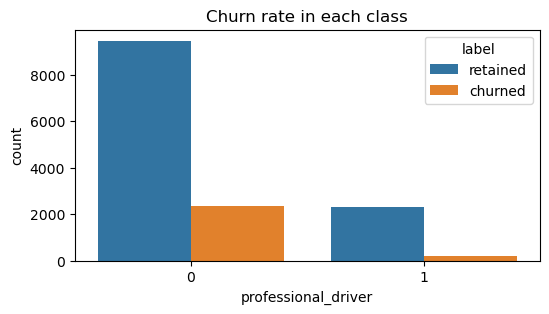

In [73]:
plt.figure(figsize = (6,3))
sns.countplot(data = data, x = 'professional_driver', hue = 'label')
plt.title('Churn rate in each class')
plt.show()

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           14299 non-null  object 
 1   sessions                        14299 non-null  int64  
 2   drives                          14299 non-null  int64  
 3   total_sessions                  14299 non-null  float64
 4   n_days_after_onboarding         14299 non-null  int64  
 5   total_navigations_fav1          14299 non-null  int64  
 6   total_navigations_fav2          14299 non-null  int64  
 7   driven_km_drives                14299 non-null  float64
 8   duration_minutes_drives         14299 non-null  float64
 9   activity_days                   14299 non-null  int64  
 10  driving_days                    14299 non-null  int64  
 11  device                          14299 non-null  object 
 12  km_per_driving_day              

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.

In [76]:
def outliers_imputation(data, col): 
    q1 = data[col].quantile(0.25) 
    q3 = data[col].quantile(0.75) 
    p95 = data[col].quantile(0.95) 
    threshold = q3 + 1.5*(q3-q1) 
    data[col] = data[col].apply(lambda x: p95 if x > threshold else x)
            

In [79]:
columns = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']
for col in columns:
    outliers_imputation(data, col)

In [80]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,device_2,label_2,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.966431,184.019345,1751.822505,114.571928,27.343940,3953.119214,1793.748464,15.544653,12.182530,581.942399,0.449837,0.645150,0.822645,0.173998
std,67.243178,55.132266,119.444358,1008.663834,124.401373,37.102159,2238.595371,1226.347967,9.016088,7.833835,1038.254509,0.286863,0.478485,0.381982,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890,0.000000,1.000000,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310,1.000000,1.000000,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251,1.000000,1.000000,0.000000
max,243.000000,202.000000,497.828725,3500.000000,430.000000,124.000000,9921.148043,4900.389759,31.000000,30.000000,15420.234110,1.530637,1.000000,1.000000,1.000000


In [83]:
data['label_2'].value_counts()

0    11763
1     2536
Name: label_2, dtype: int64

In [85]:
correlation = data.corr(method='pearson')
correlation

C:\Users\AD\AppData\Local\Temp\ipykernel_10128\3674909144.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr(method='pearson')


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,device_2,label_2,professional_driver
sessions,1.000000,0.996938,0.596397,0.007101,0.001831,0.008842,0.003098,-0.004563,0.025113,0.020294,-0.011569,0.614136,0.012704,0.034911,0.443654
drives,0.996938,1.000000,0.594484,0.006950,0.001028,0.009780,0.003567,-0.003879,0.024365,0.019612,-0.010994,0.614266,0.011686,0.035871,0.444406
total_sessions,0.596397,0.594484,1.000000,0.006476,0.000137,0.011082,0.001255,-0.000062,0.015719,0.012971,-0.016236,-0.113431,0.011942,0.024555,0.253888
n_days_after_onboarding,0.007101,0.006950,0.006476,1.000000,-0.002453,-0.004548,-0.004815,-0.010072,-0.009418,-0.007321,0.011764,-0.000874,-0.011299,-0.129263,0.003770
total_navigations_fav1,0.001831,0.001028,0.000137,-0.002453,1.000000,0.003014,-0.007561,0.005646,0.010909,0.010431,-0.000206,0.015175,-0.001315,0.052326,-0.000237
total_navigations_fav2,0.008842,0.009780,0.011082,-0.004548,0.003014,1.000000,0.003058,-0.003756,-0.004221,0.002255,0.006454,0.000316,-0.000405,0.014379,0.007306
driven_km_drives,0.003098,0.003567,0.001255,-0.004815,-0.007561,0.003058,1.000000,0.688575,-0.007404,-0.009630,0.345015,-0.001807,-0.002158,0.019489,-0.000802
duration_minutes_drives,-0.004563,-0.003879,-0.000062,-0.010072,0.005646,-0.003756,0.688575,1.000000,-0.007887,-0.009416,0.239517,-0.007836,-0.007761,0.040319,-0.012146
activity_days,0.025113,0.024365,0.015719,-0.009418,0.010909,-0.004221,-0.007404,-0.007887,1.000000,0.947687,-0.397433,0.017840,-0.010221,-0.303851,0.453825
driving_days,0.020294,0.019612,0.012971,-0.007321,0.010431,0.002255,-0.009630,-0.009416,0.947687,1.000000,-0.407917,0.013550,-0.003859,-0.294259,0.469776


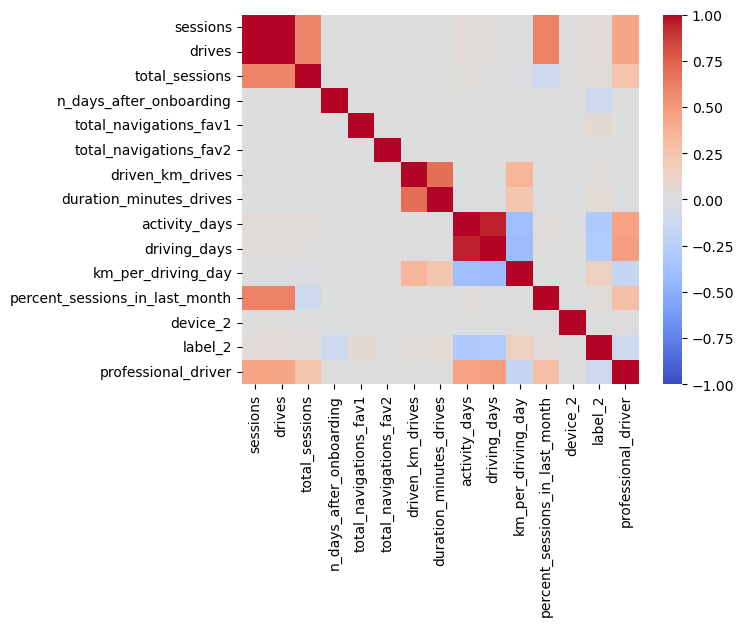

In [91]:
sns.heatmap(correlation, cmap = 'coolwarm', vmin=-1, vmax=1) 
plt.show()

Variables are multicollinear with each other

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           14299 non-null  object 
 1   sessions                        14299 non-null  float64
 2   drives                          14299 non-null  float64
 3   total_sessions                  14299 non-null  float64
 4   n_days_after_onboarding         14299 non-null  int64  
 5   total_navigations_fav1          14299 non-null  float64
 6   total_navigations_fav2          14299 non-null  float64
 7   driven_km_drives                14299 non-null  float64
 8   duration_minutes_drives         14299 non-null  float64
 9   activity_days                   14299 non-null  int64  
 10  driving_days                    14299 non-null  int64  
 11  device                          14299 non-null  object 
 12  km_per_driving_day              

In [93]:
x = data[['drives'
          , 'total_sessions'
          , 'n_days_after_onboarding'
          , 'total_navigations_fav1'
          , 'total_navigations_fav2'
          , 'driven_km_drives'
          , 'duration_minutes_drives'
          , 'activity_days'
          , 'km_per_driving_day'
          , 'percent_sessions_in_last_month'
          , 'device_2'
          , 'professional_driver']]

In [99]:
y = data['label_2']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify = y, random_state = 42)

In [101]:
model = LogisticRegression(penalty = None, max_iter = 400).fit( x_train, y_train)

In [103]:
pd.Series(model.coef_[0], index=x.columns)

drives                            0.001930
total_sessions                    0.000322
n_days_after_onboarding          -0.000406
total_navigations_fav1            0.001234
total_navigations_fav2            0.000877
driven_km_drives                 -0.000016
duration_minutes_drives           0.000110
activity_days                    -0.105937
km_per_driving_day                0.000019
percent_sessions_in_last_month   -0.000748
device_2                         -0.001044
professional_driver              -0.001527
dtype: float64

In [104]:
model.intercept_

array([-0.00170941])

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [106]:
training_probabilities = model.predict_proba(x_train)
training_probabilities

array([[0.94013104, 0.05986896],
       [0.61945841, 0.38054159],
       [0.76489713, 0.23510287],
       ...,
       [0.91900202, 0.08099798],
       [0.85145274, 0.14854726],
       [0.93518134, 0.06481866]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [109]:
logit_data = x_train.copy()
logit_data['logit'] = [np.log(prob[1] / (1-prob[1])) for prob in training_probabilities]

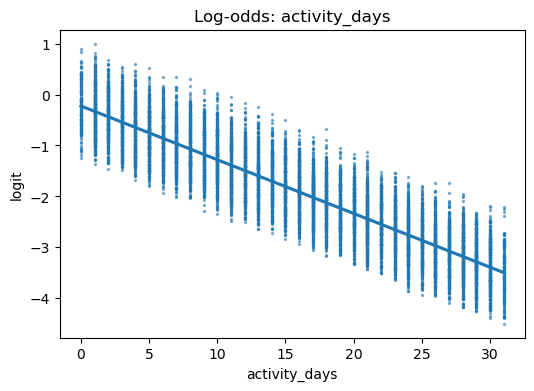

In [116]:
plt.figure(figsize = (6,4))
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days')
plt.show()

In [117]:
y_pred = model.predict(x_test)

In [119]:
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.8240559440559441


In [123]:
cm = confusion_matrix(y_test, y_pred)

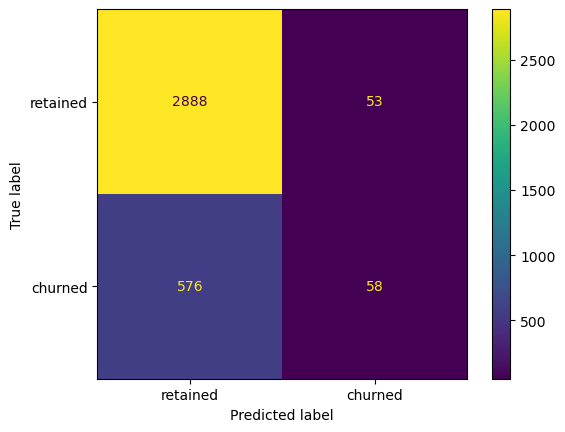

In [124]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['retained', 'churned'])
cm_display.plot()

In [130]:
target_names =['retained', 'churned']
report = classification_report(y_test, y_pred, target_names = target_names)
print(report)

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

In [131]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(x_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0019295269790601032),
 ('total_navigations_fav1', 0.0012342949990962742),
 ('total_navigations_fav2', 0.0008765433529802073),
 ('total_sessions', 0.000321859886215067),
 ('duration_minutes_drives', 0.00010992779936817728),
 ('km_per_driving_day', 1.8839131717518996e-05),
 ('driven_km_drives', -1.5543180684262304e-05),
 ('n_days_after_onboarding', -0.0004061157518017282),
 ('percent_sessions_in_last_month', -0.0007477134146579789),
 ('device_2', -0.0010435908526227515),
 ('professional_driver', -0.0015266127673390544),
 ('activity_days', -0.10593687710094708)]

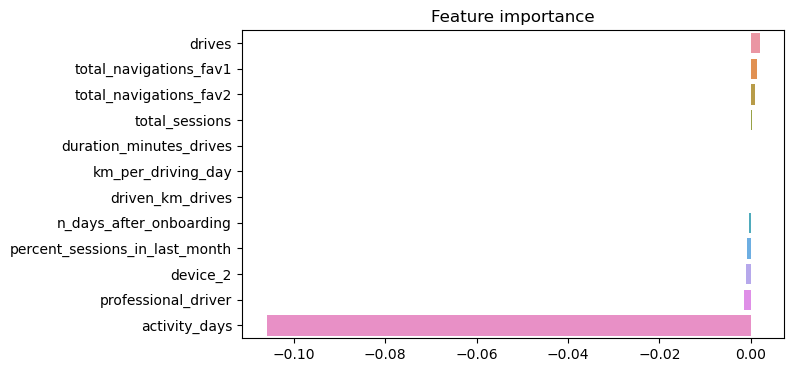

In [135]:
plt.figure(figsize = (7,4))
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')
plt.show()

1. What variable most influenced the model's prediction? How? Was this surprising?

> _`activity_days` was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn._

2. Were there any variables that you expected to be stronger predictors than they were?

> _Yes. In previous EDA, user churn rate increased as the values in `km_per_driving_day` increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable._

3. Why might a variable you thought to be important not be important in the model?

> _In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain._

4. Would you recommend that Waze use this model? Why or why not?

> _It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value._

5. What could you do to improve this model?

> _New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, one of the engineered features (`professional_driver`) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._

6. What additional features would you like to have to help improve the model?

> _It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._